In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heart.csv')
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
x = df.drop(['target'],axis =1)
y = df['target']

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x,y)
mutual_info

array([0.09489111, 0.02875256, 0.14355168, 0.0651985 , 0.27064862,
       0.        , 0.02171121, 0.16911424, 0.09856729, 0.14346936,
       0.06408888, 0.11855449, 0.14230409])

In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info

age         0.094891
sex         0.028753
cp          0.143552
trestbps    0.065199
chol        0.270649
fbs         0.000000
restecg     0.021711
thalach     0.169114
exang       0.098567
oldpeak     0.143469
slope       0.064089
ca          0.118554
thal        0.142304
dtype: float64

In [13]:
from sklearn.feature_selection import mutual_info_regression
mu_info = mutual_info_regression(x.fillna(0),y)
mu_info

array([0.07258526, 0.10888145, 0.12112036, 0.07187484, 0.24821334,
       0.0080885 , 0.        , 0.14676159, 0.13048452, 0.12243772,
       0.06479481, 0.10947092, 0.13458863])

In [14]:
mu_info = pd.Series(mu_info)
mu_info.index = x.columns
mu_info

age         0.072585
sex         0.108881
cp          0.121120
trestbps    0.071875
chol        0.248213
fbs         0.008089
restecg     0.000000
thalach     0.146762
exang       0.130485
oldpeak     0.122438
slope       0.064795
ca          0.109471
thal        0.134589
dtype: float64

<AxesSubplot:>

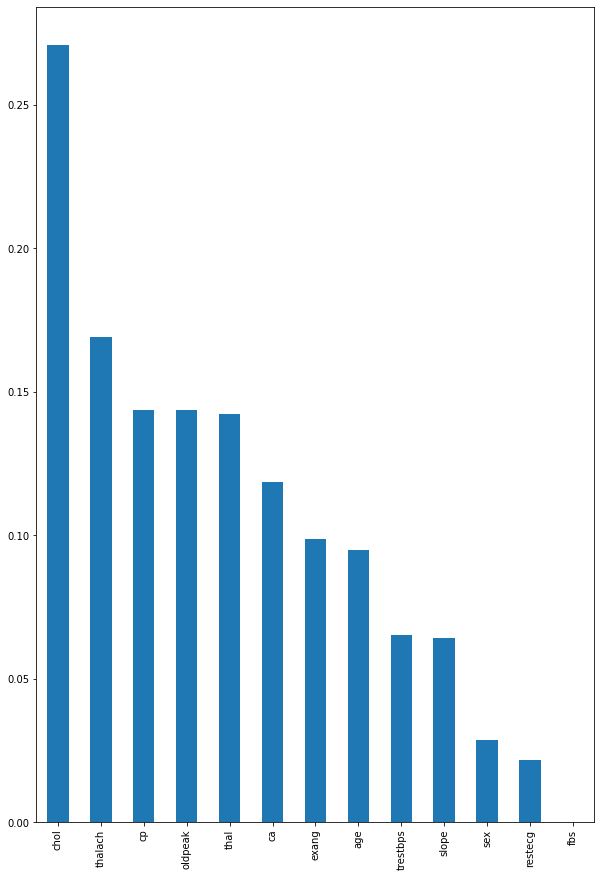

In [17]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10,15))